# Ho-Lee Model

https://en.wikipedia.org/wiki/Ho%E2%80%93Lee_model

[*********************100%***********************]  1 of 1 completed


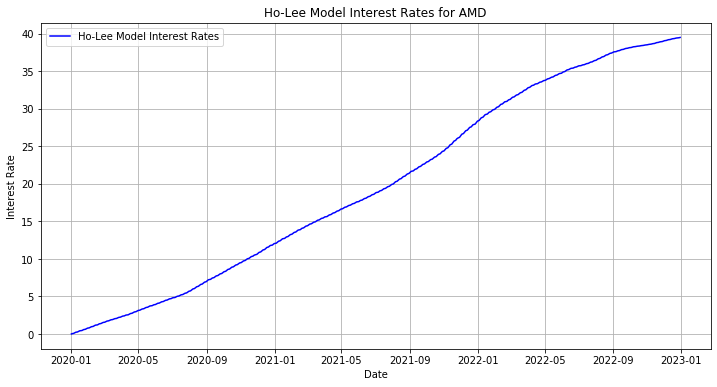

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Ho-Lee Model function
def ho_lee_model(data, volatility, delta_t):
    # Initialize variables
    r = 0  # Initial short-term interest rate
    r_list = [r]  # List to store interest rate values

    # Calculate interest rates using the Ho-Lee Model
    for i in range(1, len(data)):
        # Calculate the change in the interest rate
        dr = volatility * (data[i - 1] - r) * delta_t
        r += dr
        r_list.append(r)

    return r_list

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Parameters for the Ho-Lee Model
volatility = 0.2  # Volatility parameter (you can adjust this)
delta_t = 1 / 252  # Daily time step (assuming 252 trading days in a year)

# Apply the Ho-Lee Model
interest_rates = ho_lee_model(data, volatility, delta_t)

# Plot the interest rates
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, interest_rates, label='Ho-Lee Model Interest Rates', color='b')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Ho-Lee Model Interest Rates for ' + symbol)
plt.legend()
plt.grid()
plt.show()

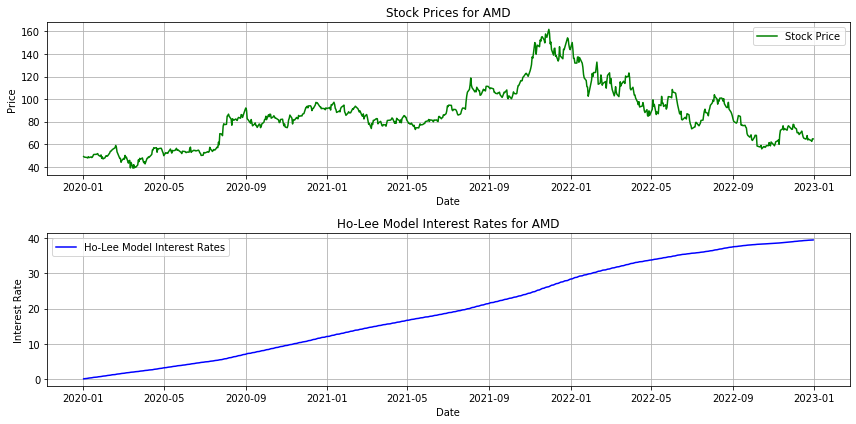

In [2]:
# Plot for stock prices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dataset.index, dataset['Adj Close'], label='Stock Price', color='g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices for ' + symbol)
plt.legend()
plt.grid()

# Create Second Plot the interest rates
plt.subplot(2, 1, 2)
plt.plot(dataset.index, interest_rates, label='Ho-Lee Model Interest Rates', color='b')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Ho-Lee Model Interest Rates for ' + symbol)
plt.legend()
plt.grid()

plt.tight_layout()  # Ensures plots do not overlap
plt.show()